In [2]:
!pip install opencv-contrib-python matplotlib numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

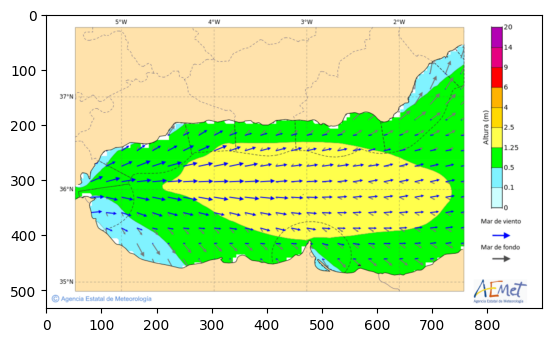

In [3]:
img = cv.imread('../images/test.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

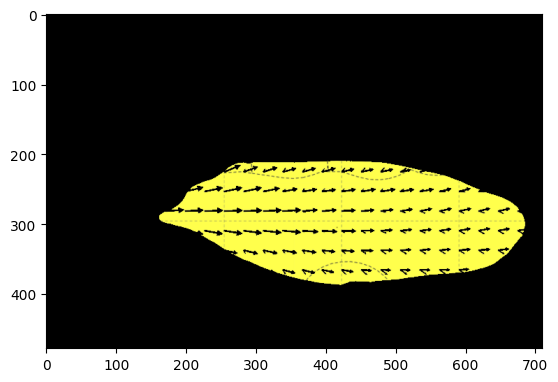

In [4]:

# just the section we need
img = img[22:500, 50:760]
# Using the colour meter, I've seen that the yellow in the image is 255,255,110. I need to detect pixels with that color.
# color detection is best done with HSV, so I'll convert both the image and the rgb color to hsv
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
rgb = np.uint8([[[255,255,110]]])
yellow = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)

# I'll use inRange to get a mask of the pixels that are close to the yellow color
lower = np.array([yellow[0][0][0] - 2, 100, 100])
upper = np.array([yellow[0][0][0] + 2, 255, 255])
mask = cv.inRange(hsv, lower, upper)

result = cv.bitwise_and(img, img, mask=mask)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))


0.5

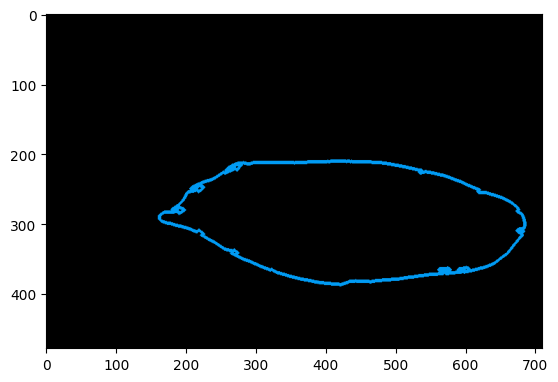

In [16]:
def rgb_to_hsv(rgb:list) -> np.ndarray:
    source = np.array(rgb, dtype=np.uint8).reshape(1, 1, 3)
    return cv.cvtColor(source, cv.COLOR_RGB2HSV)

def hsv_bounds(hsv:np.ndarray, margin:int=2) -> tuple:
    h = hsv[0, 0, 0]
    return (np.array([h - margin, 100, 100]), np.array([h + margin, 255, 255]))

c = [255,255,110]
lower, upper = hsv_bounds(rgb_to_hsv(c), 2)

mask = cv.inRange(hsv, lower, upper)
# I don't really need to see the image, i can find contours in the mask

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

area = cv.contourArea(contours[0])
# create image to draw contours on
cont_img = np.zeros_like(img)

# I'll draw the contours on the original image
cv.drawContours(cont_img, contours, -1, (244,155,0), 3)
plt.imshow(cv.cvtColor(cont_img, cv.COLOR_BGR2RGB))


area

